# Perceptron

## Var 1

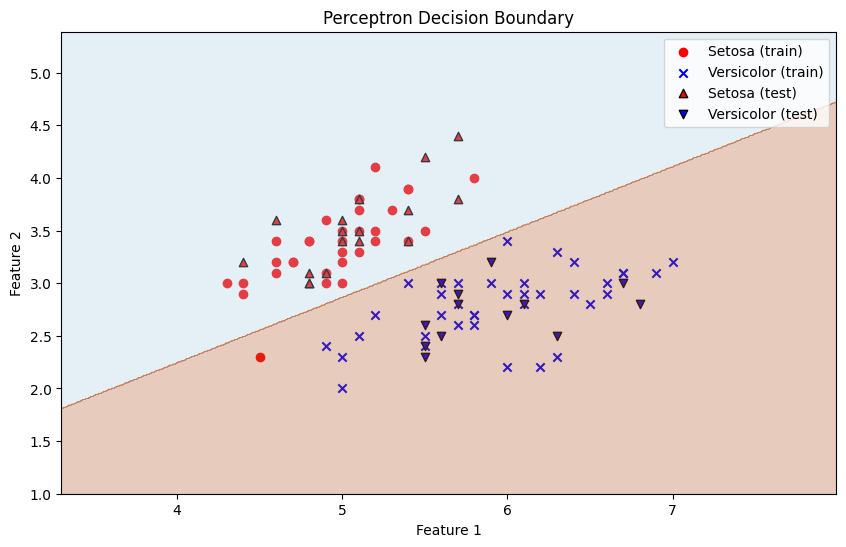

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data[:, 0:2]  # Use only the first two features
y = iris.target


X = X[y != 2]  # Select only Setosa and Versicolor classes
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', marker='o', label='Setosa (train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='Versicolor (train)')

# Plot testing data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', marker='^', edgecolor='k', label='Setosa (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue', marker='v', edgecolor='k', label='Versicolor (test)')

perceptron = Perceptron(max_iter=100, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
X_try_all = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(X_try_all)
ZZ = Z.reshape(xx.shape)
plt.contourf(xx, yy, ZZ, alpha=0.3, cmap=plt.cm.Paired)

plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [2]:
Z

array([1, 1, 1, ..., 0, 0, 0])

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Part 2

Evaluation: [('wrong', 17), ('correct', 13)]
Final weights: [-0.23  1.09]


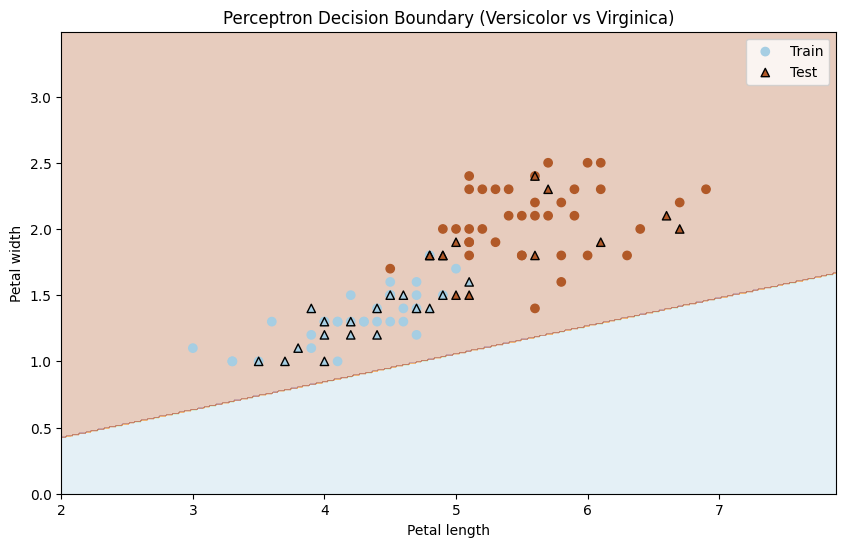

In [4]:
from collections import Counter

iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

X = X[y != 0]
y = y[y != 0]

y = np.where(y == 1, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

class Perceptron:

    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        return 0 if x < 0 else 1

    def __call__(self, in_data):
        weighted_sum = np.dot(self.weights, in_data)
        return Perceptron.unit_step_function(weighted_sum)

    def fit(self, target_result, calculated_result, in_data):
        in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

    def predict(self, data):
        predictions = []
        for index in range(len(data)):
            predictions.append(int(round(self(data[index]))))
        return predictions


p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(X_train)):
    p.fit(y_train[index], p(X_train[index]), X_train[index])

evaluation = p.evaluate(X_test, y_test)
print("Evaluation:", evaluation.most_common())
print("Final weights:", p.weights)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
X_try_all = np.c_[xx.ravel(), yy.ravel()]

Zn = p.predict(X_try_all)
Zn = np.asarray(Zn)
ZZn = Zn.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, ZZn, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='^', edgecolor='k', label='Test')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Perceptron Decision Boundary (Versicolor vs Virginica)")
plt.legend()
plt.show()




In [5]:
Zn

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
X_train[0:10,:]

array([[4.2, 1.5],
       [4.3, 1.3],
       [6.1, 2.3],
       [4.5, 1.5],
       [5.9, 2.3],
       [4.5, 1.3],
       [5.5, 1.8],
       [5.3, 2.3],
       [4.5, 1.6],
       [4.5, 1.5]])